In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# scintific computing libraries
import pandas as pd                                      
import numpy as np                    
from scipy import optimize, stats        

# visualisation libraries
import matplotlib.pyplot as plt                      
import seaborn as sns                

# algorithmic library
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from keras.utils import np_utils

In [ ]:
df_train = pd.read_csv('sales_train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_items = pd.read_csv('items.csv', index_col='item_id')
df_categories = pd.read_csv('categories.csv', index_col='category_id')
df_shops = pd.read_csv('shops.csv', index_col='shop_id')
df_test = pd.read_csv('test.csv')


In [ ]:
df_shops

,shop_name
shop_id,
0,"! Yakutsk Ordzhonikidze, 56 francs"
1,"! Yakutsk TC ""Central"" fran"
2,"Adygea TC ""Mega"""
3,"Balashikha TC ""Oktyabr-Kinomir"""
4,"Volga TC ""Volga Mall"""
5,"Vologda SEC ""Marmelad"""
6,"Voronezh (Plekhanovskaya, 13)"
7,"Voronezh SEC ""Maksimir"""
8,"Voronezh SEC City-Park ""Grad"""


In [ ]:
df_items.describe()
# df_categories.describe()
# df_shops.describe()

,category_id
count,22170.000000
mean,46.290753
std,15.941486
min,0.000000
25%,37.000000
50%,40.000000
75%,58.000000
max,83.000000


In [ ]:
df_categories.describe()
# df_shops.describe()

,category_name
count,84
unique,84
top,Game consoles - PS3
freq,1


In [ ]:
df_shops.describe()

,shop_name
count,60
unique,60
top,RostovNaDon Mega shopping center
freq,1


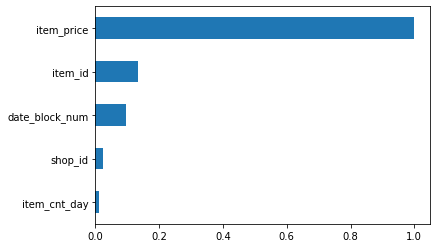

In [ ]:
df_train.corr()["item_price"].abs().sort_values().plot.barh();

In [ ]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
df_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [ ]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
df_train.isnull().sum()

date            0
shop_id         0
item_id         0
item_cnt_day    0
dtype: int64

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'], dayfirst=True)
df_train['date'] = df_train['date'].apply(lambda x: x.strftime('%Y-%m'))
df_train.head()

NameError: name 'pd' is not defined

In [ ]:
df = df_train.groupby(['date','shop_id','item_id']).sum()
#df = df.pivot_table(index=['shop_id','item_id'], columns='date', values='item_cnt_day', fill_value=0)
#df.reset_index(inplace=True)
df.head()

NameError: name 'df_train' is not defined

In [ ]:
df_test = pd.merge(df_test, df, on=['shop_id','item_id'], how='left')
df_test.drop(['ID', '2013-01'], axis=1, inplace=True)
df_test = df_test.fillna(0)
df_test.head()

,shop_id,item_id,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_train = df['2015-10'].values
X_train = df.drop(['2015-10'], axis = 1)
X_test = df_test

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(424124, 35) (424124,)
(214200, 35)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( X_train, Y_train, test_size=0.2, random_state=101)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (339299, 35) (339299,)
Test set: (84825, 35) (84825,)


In [ ]:
RFR = RandomForestRegressor(n_estimators = 100)
RFR.fit(x_train,y_train)

print('Train set mse:', mean_squared_error(y_train, RFR.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, RFR.predict(x_test)))
print('Test set score:', RFR.score(x_train,y_train))

Train set mse: 2.8712348536246783
Test set mse: 1.612203575596817
Test set score: 0.8477878922583748


In [ ]:
prediction = RFR.predict(X_test)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32ebab46-e526-42a3-8966-92f4ff6ef571' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>